In [1]:
import os
import shutil
import keras.utils as image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

2024-01-10 14:20:18.461636: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def create_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
base_dir = 'data'
create_directory(base_dir)

train_dir = os.path.join(base_dir,'train')
create_directory(train_dir)
test_dir = os.path.join(base_dir,'test')
create_directory(test_dir)

train_person_dir = os.path.join(train_dir,'person')
create_directory(train_person_dir)
test_person_dir = os.path.join(test_dir,'person')
create_directory(test_person_dir)

train_nperson_dir = os.path.join(train_dir,'nperson')
create_directory(train_nperson_dir)
test_nperson_dir = os.path.join(test_dir,'nperson')
create_directory(test_nperson_dir)

In [3]:
original_dir_person = os.path.join(base,'images/person')
original_dir_nperson = os.path.join(base,'images/no_person')

fnames = ['person_{}.jpg'.format(i) for i in range(500)]
for fname in fnames:
    src = os.path.join(original_dir_person, fname)
    dst = os.path.join(train_person_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['image_{}.jpg'.format(i) for i in range(500)]
for fname in fnames:
    src = os.path.join(original_dir_nperson, fname)
    dst = os.path.join(train_nperson_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['person_{}.jpg'.format(i) for i in range(500,600)]
for fname in fnames:
    src = os.path.join(original_dir_person, fname)
    dst = os.path.join(test_person_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['image_{}.jpg'.format(i) for i in range(500,600)]
for fname in fnames:
    src = os.path.join(original_dir_nperson, fname)
    dst = os.path.join(test_nperson_dir, fname)
    shutil.copyfile(src, dst)

NameError: name 'shutil' is not defined

In [3]:
print('total training person images:', len(os.listdir(train_person_dir)))
print('total test person images:', len(os.listdir(test_person_dir)))

total training person images: 501
total test person images: 100


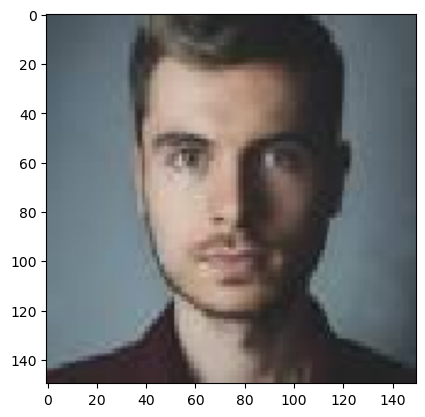

In [4]:
#displaying picture
img_path = train_person_dir+'/person_5.jpg'
img = image.load_img(img_path, target_size=(150, 150)) 
plt.imshow(img)
plt.show()

In [5]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

/Users/prabhatvashishth/Desktop/Projects/Havells/rec/lib/python3.11/site-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir , target_size = (150,150),
                                                   batch_size = 20, class_mode = 'binary')
test_generator = test_datagen.flow_from_directory(test_dir , target_size = (150,150),
                                                   batch_size = 20, class_mode = 'binary')

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [9]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


/Users/prabhatvashishth/Desktop/Projects/Havells/rec/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


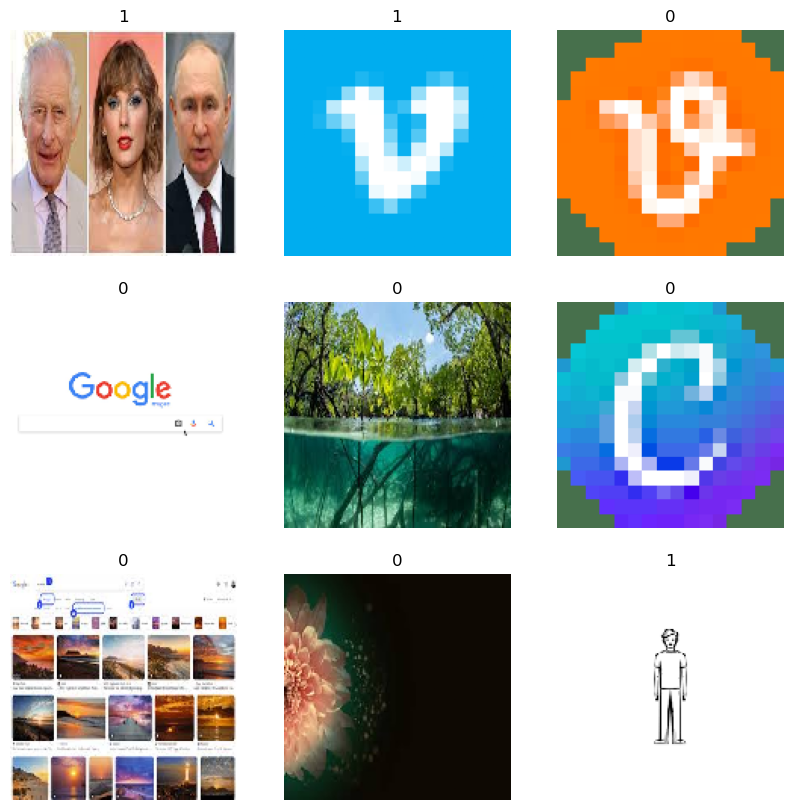

In [10]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(data_batch[i])
    plt.title(int(labels_batch[i]))
    plt.axis("off")

In [11]:
history = model.fit(
      train_generator,
      steps_per_epoch=20,
      epochs=50,
    validation_data=test_generator,
      validation_steps=10)

Epoch 1/50


2024-01-10 14:21:01.006387: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


20/20 [==============================] - ETA: 0s - loss: 0.7075 - acc: 0.4750

2024-01-10 14:21:06.602308: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


20/20 [==============================] - 6s 293ms/step - loss: 0.7075 - acc: 0.4750 - val_loss: 0.6977 - val_acc: 0.5000
Epoch 2/50
20/20 [==============================] - 6s 281ms/step - loss: 0.6870 - acc: 0.5725 - val_loss: 0.6779 - val_acc: 0.5200
Epoch 3/50
20/20 [==============================] - 6s 282ms/step - loss: 0.6786 - acc: 0.5800 - val_loss: 0.6765 - val_acc: 0.5150
Epoch 4/50
20/20 [==============================] - 6s 281ms/step - loss: 0.6673 - acc: 0.6025 - val_loss: 0.6636 - val_acc: 0.5900
Epoch 5/50
20/20 [==============================] - 5s 276ms/step - loss: 0.6767 - acc: 0.5925 - val_loss: 0.6564 - val_acc: 0.6750
Epoch 6/50
20/20 [==============================] - 6s 277ms/step - loss: 0.6580 - acc: 0.6300 - val_loss: 0.6404 - val_acc: 0.7150
Epoch 7/50
20/20 [==============================] - 6s 292ms/step - loss: 0.6467 - acc: 0.6300 - val_loss: 0.6336 - val_acc: 0.6700
Epoch 8/50
20/20 [==============================] - 6s 286ms/step - loss: 0.6217 - acc:

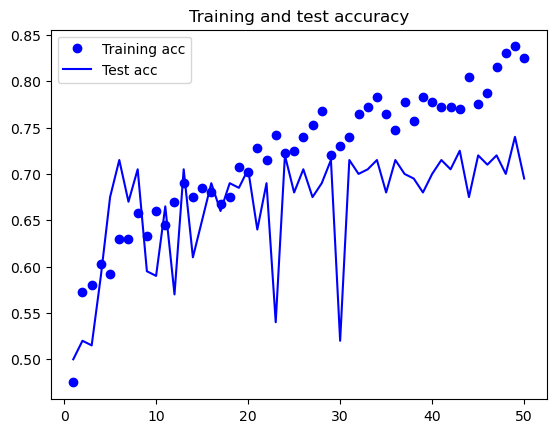

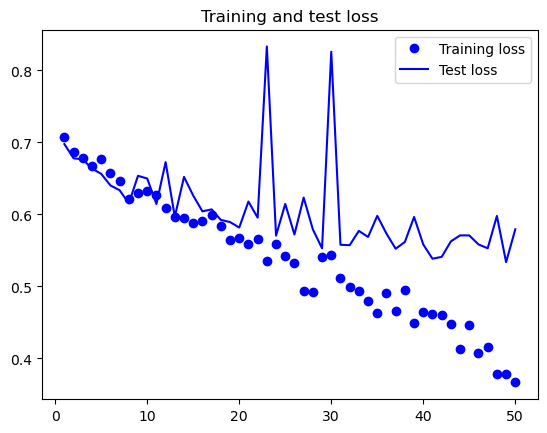

In [12]:
acc = history.history['acc']
test_acc = history.history['val_acc']
loss = history.history['loss']
test_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, test_acc, 'b', label='Test acc')
plt.title('Training and test accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, test_loss, 'b', label='Test loss')
plt.title('Training and test loss')
plt.legend()
plt.show()

In [13]:
model.save('img_rec.h5')

1/1 [==============================] - 0s 78ms/step


'person'

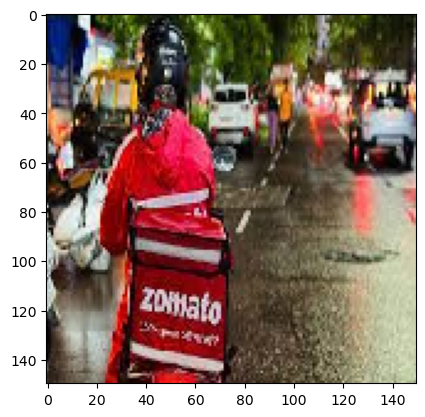

In [14]:
img = image.load_img("static/image_506.jpg", target_size=(150, 150)) 
plt.imshow(img)
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) 
img_tensor /= 255.

predictions = model.predict(img_tensor)
p = {1:'person',0:'not_person'}
p[round(predictions[0][0])]

In [28]:
#using VGG16
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [29]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [30]:
datagen = ImageDataGenerator(rescale=1./255) 
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512)) 
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory( directory, 
                                            target_size=(150, 150), 
                                            batch_size=batch_size, 
                                            class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch 
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features,labels

In [34]:
train_features, train_labels = extract_features(train_dir, 1000)  
test_features, test_labels = extract_features(test_dir, 200)

Found 1000 images belonging to 2 classes.
1/1 [==============================] - 2s 2s/step
Found 200 images belonging to 2 classes.
1/1 [==============================] - 2s 2s/step


In [35]:
train_features = np.reshape(train_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (200, 4 * 4 * 512))

In [36]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(test_features, test_labels))

Epoch 1/30
50/50 [==============================] - 1s 8ms/step - loss: 0.7002 - acc: 0.5650 - val_loss: 0.5776 - val_acc: 0.6900
Epoch 2/30
50/50 [==============================] - 0s 7ms/step - loss: 0.6361 - acc: 0.6370 - val_loss: 0.5575 - val_acc: 0.6750
Epoch 3/30
50/50 [==============================] - 0s 7ms/step - loss: 0.5925 - acc: 0.6640 - val_loss: 0.5166 - val_acc: 0.7300
Epoch 4/30
50/50 [==============================] - 0s 6ms/step - loss: 0.5664 - acc: 0.6810 - val_loss: 0.5008 - val_acc: 0.7350
Epoch 5/30
50/50 [==============================] - 0s 6ms/step - loss: 0.5252 - acc: 0.7260 - val_loss: 0.4925 - val_acc: 0.7150
Epoch 6/30
50/50 [==============================] - 0s 7ms/step - loss: 0.5238 - acc: 0.7330 - val_loss: 0.4793 - val_acc: 0.7500
Epoch 7/30
50/50 [==============================] - 0s 6ms/step - loss: 0.4947 - acc: 0.7530 - val_loss: 0.4813 - val_acc: 0.7250
Epoch 8/30
50/50 [==============================] - 0s 6ms/step - loss: 0.4928 - acc: 0.75

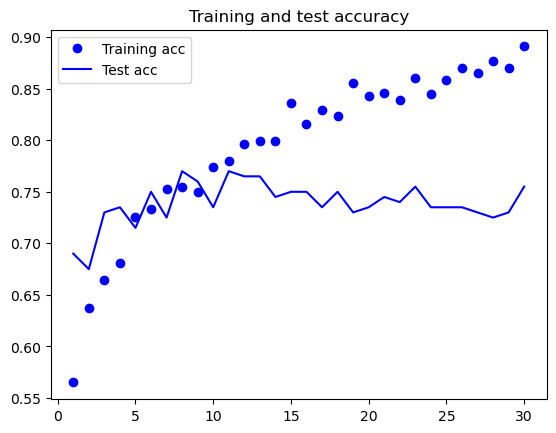

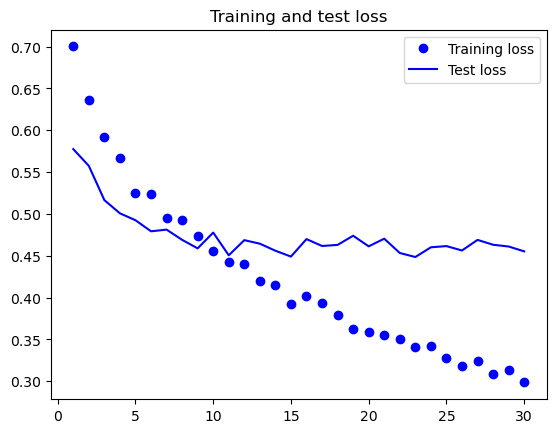

In [37]:
acc = history.history['acc']
test_acc = history.history['val_acc']
loss = history.history['loss']
test_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, test_acc, 'b', label='Test acc')
plt.title('Training and test accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, test_loss, 'b', label='Test loss')
plt.title('Training and test loss')
plt.legend()
plt.show()